<a href="https://colab.research.google.com/github/KrishnenduGhorui/ML-Project-code/blob/main/Classification_of_mobile_price_range_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_mobilePrice=pd.read_csv('/content/Mobile_price_data .csv')
df_mobilePrice.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]

In [ ]:
df_mobilePrice.price_range.unique()

array([1, 2, 3, 0])

In [ ]:
df_mobilePrice.drop(columns=['talk_time'],inplace=True)   # talk time is not a estimator of mobile price , so dropping it
df_mobilePrice.head()

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 20 columns]

In [ ]:
df_mobilePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

By info, it is clear that no null value there in data and no object type data there so, encodding not required. 

In [ ]:
df_mobilePrice.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 20 columns]

from result of describe function , it is seens that there is comapretivly large difference between 75% and max value for features 'fc' and 'px_height' ,outlier may exist in these two fetaures. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

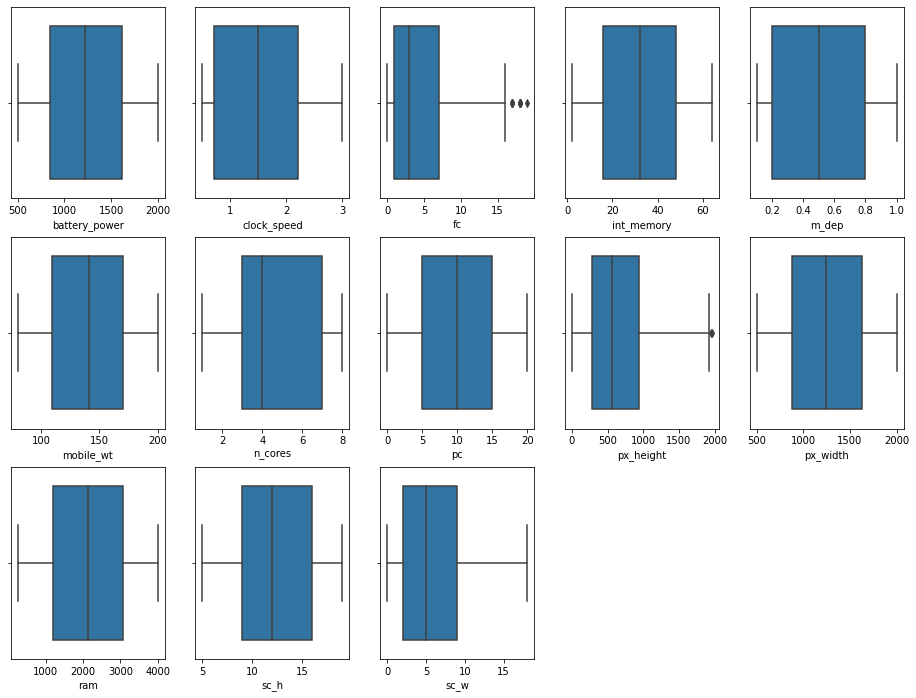

In [ ]:
plt.figure(figsize=(16,12))
col_contVal=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w']
for i in range(1,len(col_contVal)+1):
  plt.subplot(3,5,i)
  sns.boxplot(df_mobilePrice[col_contVal[i-1]])

Above box plots shows there is some outlier in features 'fc' and 'px_height'

**Outlier handling** - outlier replaced by upper limit value 

In [ ]:
q1_fc=np.quantile(df_mobilePrice.fc,.25)
q3_fc=np.quantile(df_mobilePrice.fc,.75)
IQR_fc=q3_fc-q1_fc
mean_fc=df_mobilePrice.fc.mean()
ul_fc=q3_fc+1.5*IQR_fc

In [ ]:
q1_px_height=np.quantile(df_mobilePrice.px_height,.25)
q3_px_height=np.quantile(df_mobilePrice.px_height,.75)
IQR_px_height=q3_px_height-q1_px_height
mean_px_height=df_mobilePrice.px_height.mean()
ul_px_height=q3_px_height+1.5*IQR_px_height

In [ ]:
df_mobilePrice.loc[df_mobilePrice['fc']>ul_fc,'fc']=ul_fc
df_mobilePrice.loc[df_mobilePrice['px_height']>ul_px_height,'px_height']=ul_px_height

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

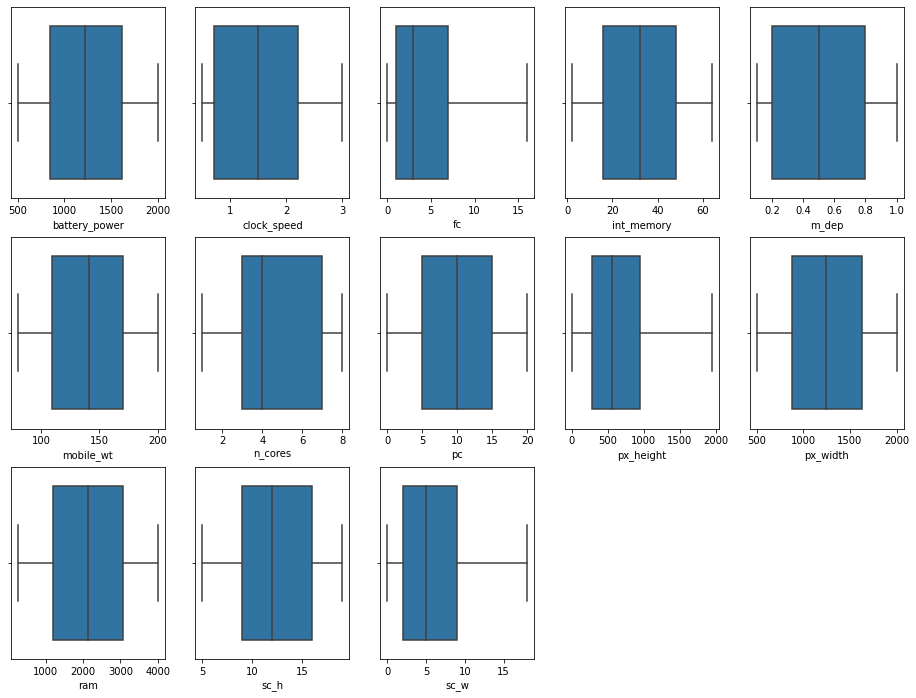

In [ ]:
plt.figure(figsize=(16,12))
col_contVal=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w']
for i in range(1,len(col_contVal)+1):
  plt.subplot(3,5,i)
  sns.boxplot(df_mobilePrice[col_contVal[i-1]])

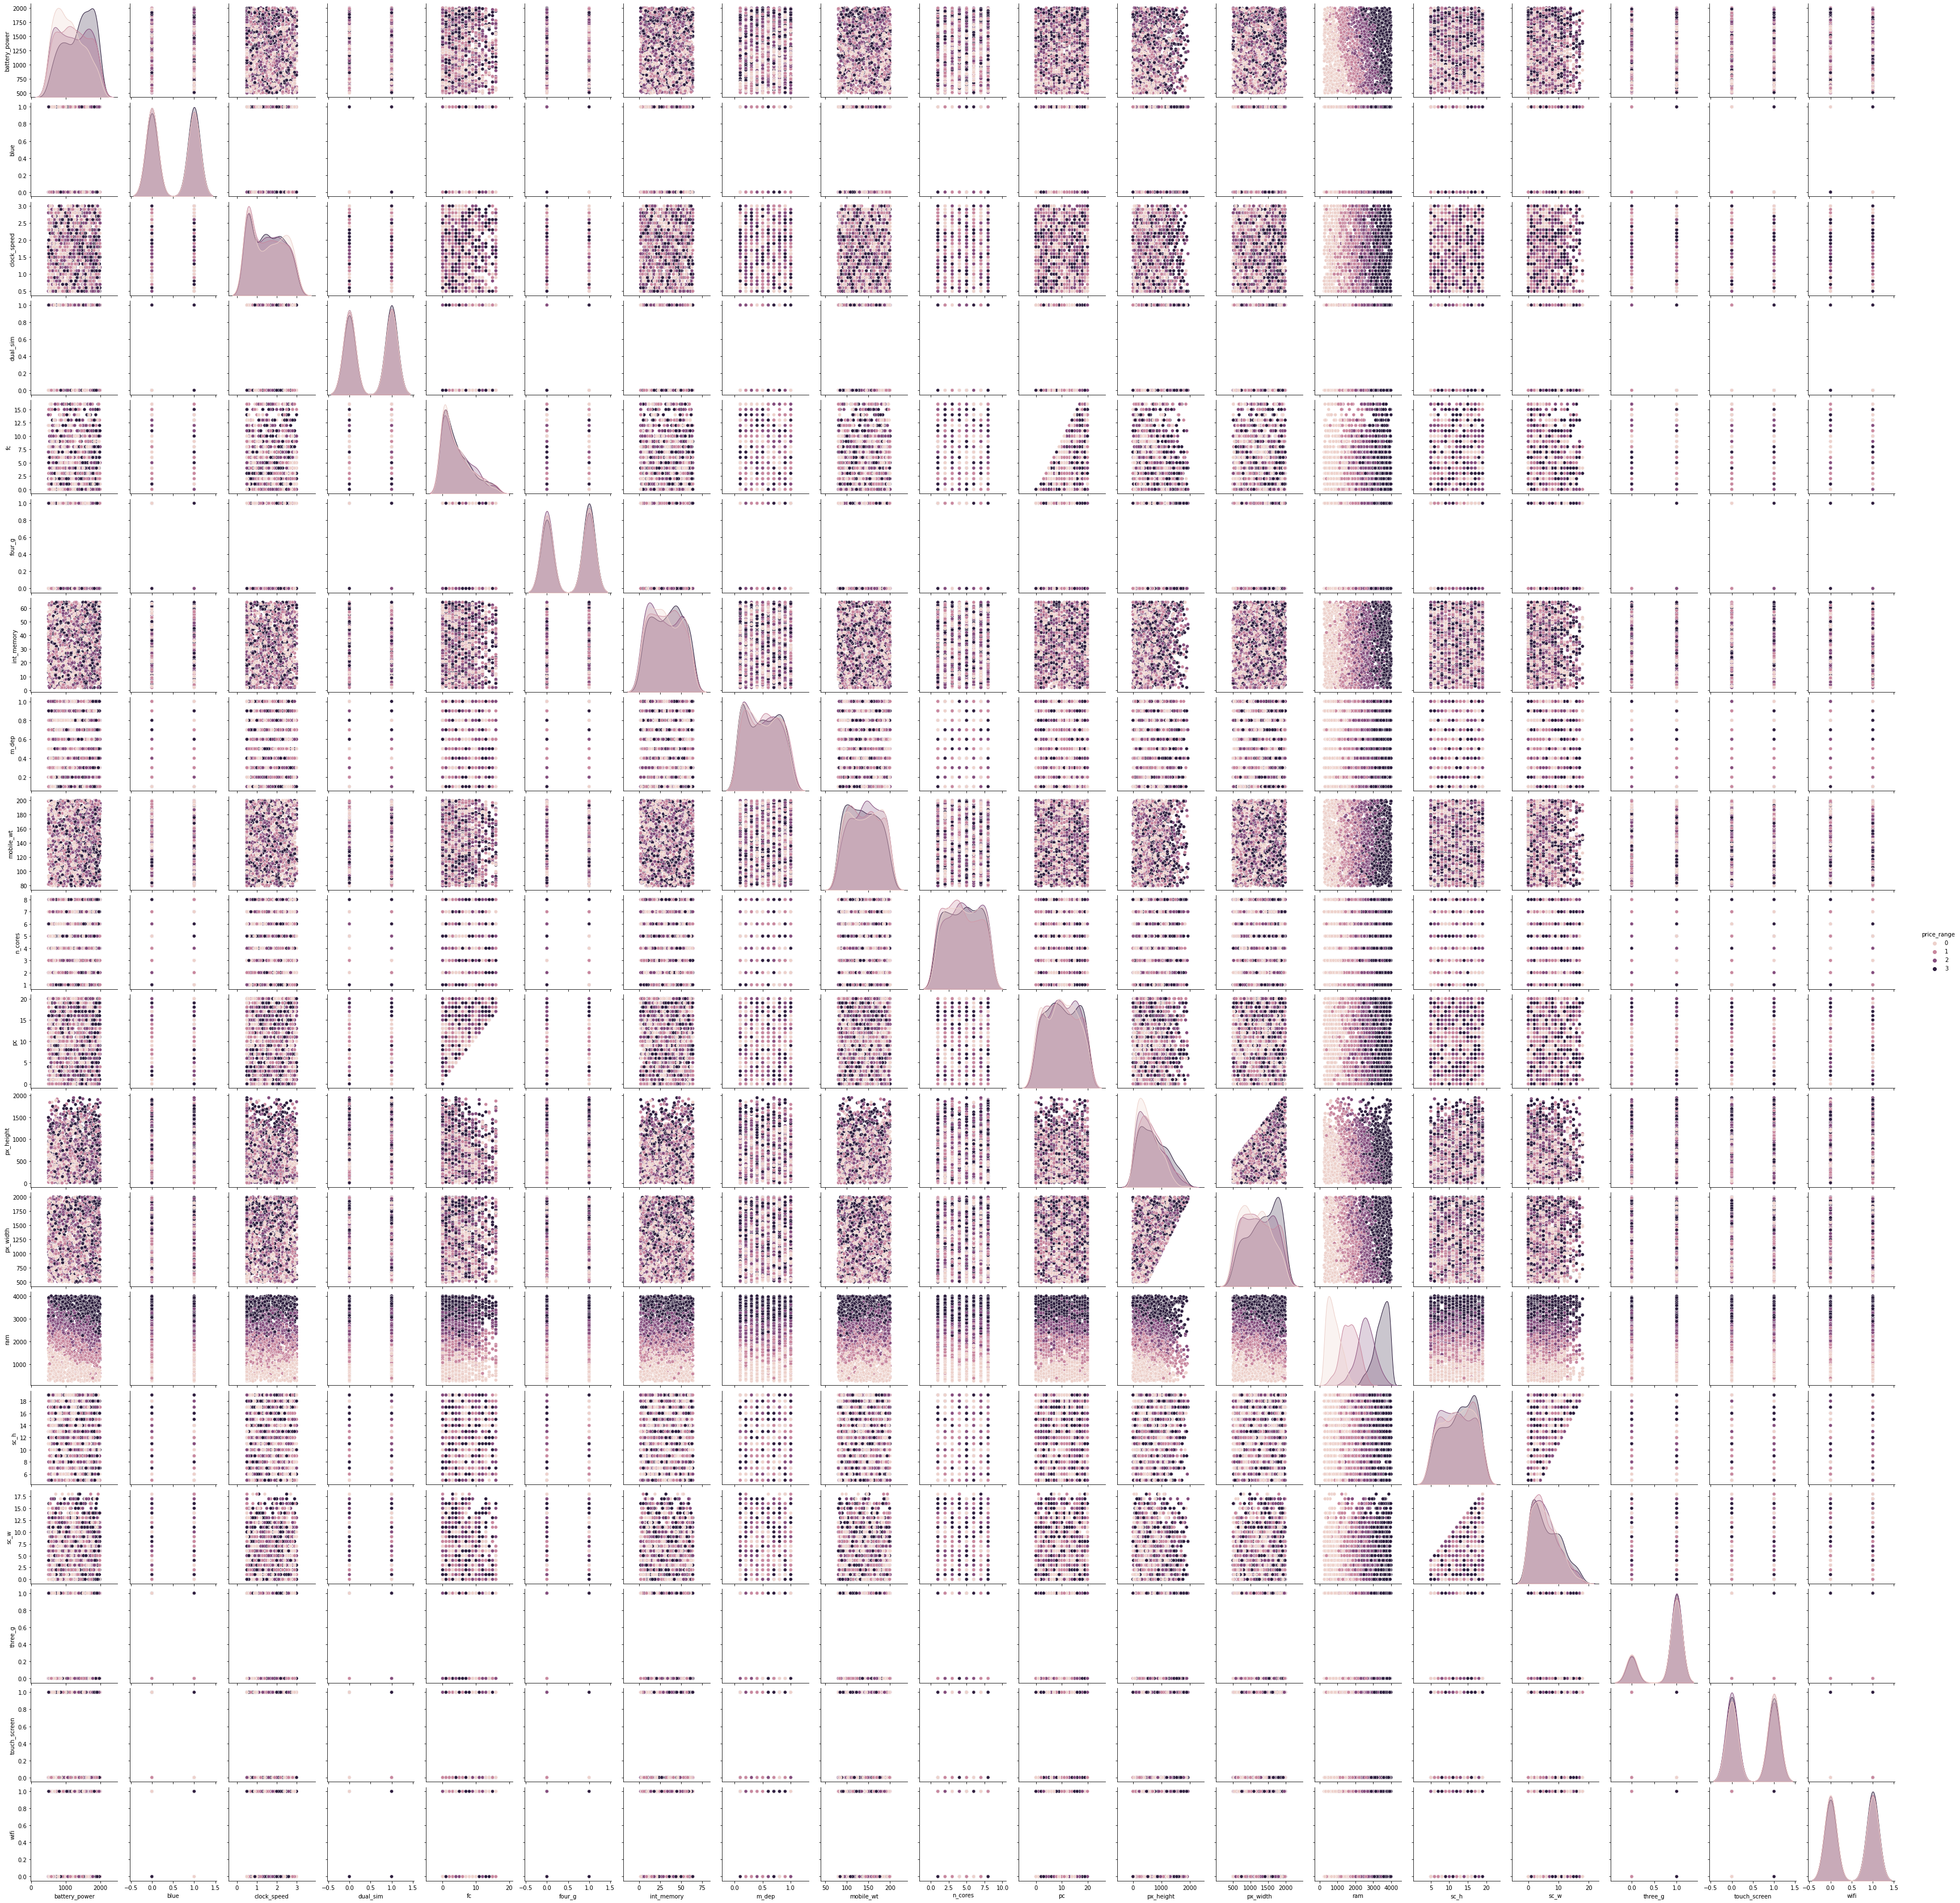

In [ ]:
sns.pairplot(df_mobilePrice,hue='price_range')

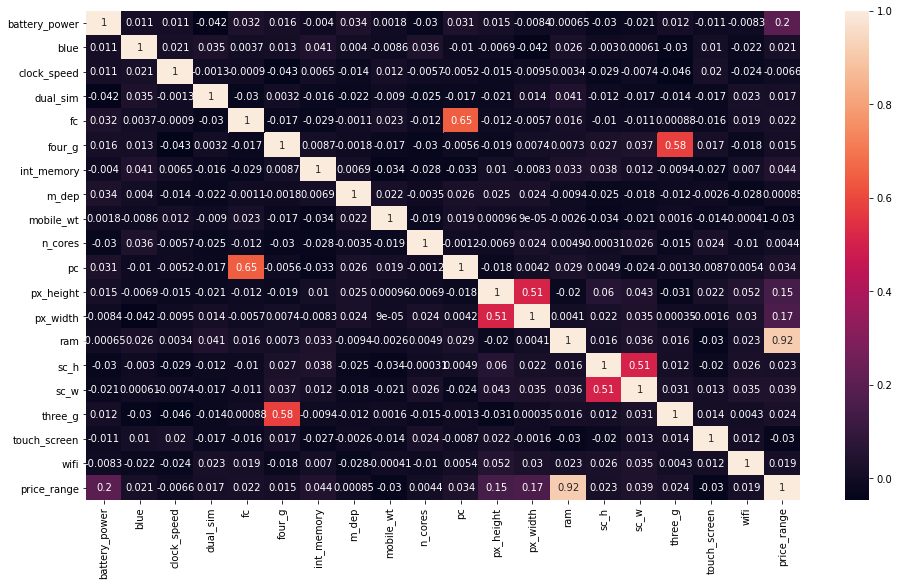

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_mobilePrice.corr(),color='g',annot=True)

In [ ]:
df_mobilePrice.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148852
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.022491
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

It is seens , there are some features that have very less correlation with target feature 'price_range', so these features has not that much impact to target fetaure , those can be removed.

In [ ]:
col_lowCorrelation=['n_cores','m_dep','clock_speed']
df_mobilePrice.drop(columns=col_lowCorrelation,inplace=True)
df_mobilePrice.head()

battery_power  blue  dual_sim  ...  touch_screen  wifi  price_range
0            842     0         0  ...             0     1            1
1           1021     1         1  ...             1     0            2
2            563     1         1  ...             1     0            2
3            615     1         0  ...             0     0            2
4           1821     1         0  ...             1     0            1

[5 rows x 17 columns]

In [ ]:
x=df_mobilePrice.iloc[:,:-1]
y=df_mobilePrice.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=1)

# **Random Forest ML model** 

Hyperparameter tuning for Random Forest Classifier 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RFC_objct=RandomForestClassifier()
parameters={'n_estimators':[20,40,60,80,100,120,140,160,180],'criterion':['gini','entropy']}
GSCV_RFC=GridSearchCV(estimator=RFC_objct,param_grid=parameters,cv=5)
GSCV_RFC.fit(x_train,y_train)
print(GSCV_RFC.best_score_)
print(GSCV_RFC.best_params_)

0.8962499999999999
{'criterion': 'entropy', 'n_estimators': 160}


Training Random Forest classifier model by best parameters as per hyperparameter tuning 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=160,criterion='entropy')
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Testing the trained random forest classifier model 

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_rfc=RFC.predict(x_test)
AccScore_rfc=RFC.score(x_test,y_test)
print('Accuracy score of Random Forest classifier model -',AccScore_rfc)
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
print('Confusion matrix of Random Forest classifier model - \n',cm_rfc)

Accuracy score of Random Forest classifier model - 0.86
Confusion matrix of Random Forest classifier model - 
 [[83  9  0  0]
 [ 8 77 11  0]
 [ 0 13 89  4]
 [ 0  0 11 95]]


**Standard scaling to data** 

Training and transforming (scaling) train data 

In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
col_contValue=['battery_power','fc','int_memory','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w']
x_train_StdScaledP1=pd.DataFrame(SC.fit_transform(x_train[col_contValue]),columns=col_contValue,index=x_train.index)

In [ ]:
x_train_StdScaledP1

battery_power        fc  int_memory  ...       ram      sc_h      sc_w
0         -0.931816 -0.768209   -1.397035  ...  0.398985 -0.787650  0.292587
816       -1.016747 -1.001398    1.739356  ... -1.550368 -0.311189  0.063107
790       -0.773432 -1.001398    0.748917  ... -1.600680 -0.787650 -0.166373
361       -0.800977  2.030049    1.354185  ... -1.599765 -0.311189 -1.084293
592        0.034559  1.796861    1.739356  ... -0.850577  0.403503 -0.625333
...             ...       ...         ...  ...       ...       ...       ...
1791      -0.103167 -1.001398   -1.176938  ... -0.403259  1.118195  1.669466
1096      -0.215643  0.397732    0.143648  ...  1.051209  0.879964  2.128426
1932      -1.216449 -0.768209   -0.131474  ... -0.468207 -0.549419  0.751547
235        0.631370  0.397732   -1.176938  ... -1.286002  1.594656  0.522067
1061       0.629075 -0.068645   -0.241523  ... -0.681346  0.403503 -0.166373

[1600 rows x 10 columns]

In [ ]:
col_binaryEncdd=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
x_train_StdScld=pd.concat([x_train_StdScaledP1,x_train[col_binaryEncdd]],axis=1)
x_train_StdScld

battery_power        fc  int_memory  ...  three_g  touch_screen  wifi
0         -0.931816 -0.768209   -1.397035  ...        0             0     1
816       -1.016747 -1.001398    1.739356  ...        0             1     1
790       -0.773432 -1.001398    0.748917  ...        0             1     0
361       -0.800977  2.030049    1.354185  ...        1             1     0
592        0.034559  1.796861    1.739356  ...        0             0     1
...             ...       ...         ...  ...      ...           ...   ...
1791      -0.103167 -1.001398   -1.176938  ...        1             1     0
1096      -0.215643  0.397732    0.143648  ...        1             0     0
1932      -1.216449 -0.768209   -0.131474  ...        1             1     1
235        0.631370  0.397732   -1.176938  ...        1             1     0
1061       0.629075 -0.068645   -0.241523  ...        1             0     1

[1600 rows x 16 columns]

Transform test data with trained GridSearchCV model 

In [ ]:
x_test_StdScaledP1=pd.DataFrame(SC.transform(x_test[col_contValue]),columns=col_contValue,index=x_test.index)
x_test_StdScld=pd.concat([x_test_StdScaledP1,x_test[col_binaryEncdd]],axis=1)
x_test_StdScld

battery_power        fc  int_memory  ...  three_g  touch_screen  wifi
674       -0.491094 -0.535021    0.693892  ...        1             0     0
1699      -0.564548 -0.768209    0.693892  ...        1             1     0
1282      -1.466651 -0.068645   -1.231962  ...        1             1     1
1315       0.601530 -0.768209   -0.021425  ...        1             0     1
1210      -1.016747 -1.001398    1.409210  ...        1             0     0
...             ...       ...         ...  ...      ...           ...   ...
400        0.041445 -1.001398   -1.397035  ...        1             1     1
763        1.131774 -1.001398   -1.011865  ...        1             0     0
385        1.450838 -0.068645   -0.791767  ...        1             0     0
1667       1.650541 -1.001398    0.748917  ...        1             1     0
1820      -1.338107 -1.001398   -0.076450  ...        1             0     0

[400 rows x 16 columns]

# **K nearest neighbor model** 

Hyperparameter tuning for K-nearest Neighbors model 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knnc_object=KNeighborsClassifier()
GSCV_KNN=GridSearchCV(estimator=knnc_object,param_grid={'n_neighbors':[4,5,6,7,8,9,10]})
GSCV_KNN.fit(x_train_StdScld,y_train)
print(GSCV_KNN.best_score_)
print(GSCV_KNN.best_params_)

0.66625
{'n_neighbors': 10}


In [ ]:
knc_model=KNeighborsClassifier(n_neighbors=10)
knc_model.fit(x_train_StdScld,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_knc=knc_model.predict(x_test_StdScld)
print('Accuracy score of k-nearest neighbors model - ',knc_model.score(x_test_StdScld,y_test))
print('Confusion matrix of k-nearest neighbors  - \n',confusion_matrix(y_test,y_pred_knc))

Accuracy score of k-nearest neighbors model -  0.6625
Confusion matrix of k-nearest neighbors  - 
 [[81 11  0  0]
 [24 52 19  1]
 [ 2 32 63  9]
 [ 0  1 36 69]]


# **Support vector machine** 

Hyper parameter tuning for svc model 

In [ ]:
from sklearn.svm import SVC
SVC_object=SVC()
parameters_svc={'C':[0.0001,0.001,0.01,0.1,1,10,100],'kernel':['poly','rbf'],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
GSCV_SVC=GridSearchCV(estimator=SVC_object,param_grid=parameters_svc,cv=5)
GSCV_SVC.fit(x_train_StdScld,y_train)
print(GSCV_SVC.best_score_)
print(GSCV_SVC.best_params_)

0.9493750000000001
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC model training 

In [ ]:
SVC_model=SVC(C=100,kernel='rbf',gamma=0.001)
SVC_model.fit(x_train_StdScld,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC model evaluation 

In [ ]:
print('Accuracy score of SVC model -',SVC_model.score(x_test_StdScld,y_test))
y_pred_svc=SVC_model.predict(x_test_StdScld)
print('Confusion matrix of SVC model - \n',confusion_matrix(y_test,y_pred_svc))

Accuracy score of SVC model - 0.945
Confusion matrix of SVC model - 
 [[ 90   2   0   0]
 [  3  90   3   0]
 [  0   7  97   2]
 [  0   0   5 101]]


So, here support vector classifier model performed classification best having accuracy score 0.945 , so for this dataset , we will go for support vector classifier model. 